In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

In [2]:
df = pd.read_csv('/content/OnlineRetail.csv', encoding='latin1')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
customer_df = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',  # Order frequency
    'UnitPrice': 'sum'      # Total spending
}).reset_index()

customer_df

,CustomerID,InvoiceNo,UnitPrice
0,12346.0,2,2.08
1,12347.0,7,481.21
2,12348.0,4,178.71
3,12349.0,1,605.10
4,12350.0,1,65.30
...,...,...,...
4367,18280.0,1,47.65
4368,18281.0,1,39.36
4369,18282.0,3,62.68
4370,18283.0,16,1220.93


In [5]:
df = df.drop('CustomerID',  axis=1)
df = df.drop('InvoiceNo', axis=1)
df = df.drop('InvoiceDate', axis=1)
df = df.drop('Description', axis=1)
df = df.drop('StockCode', axis=1)
df = df.drop('Country', axis=1)

In [6]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [7]:
df.head()

,Quantity,UnitPrice,TotalPrice
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


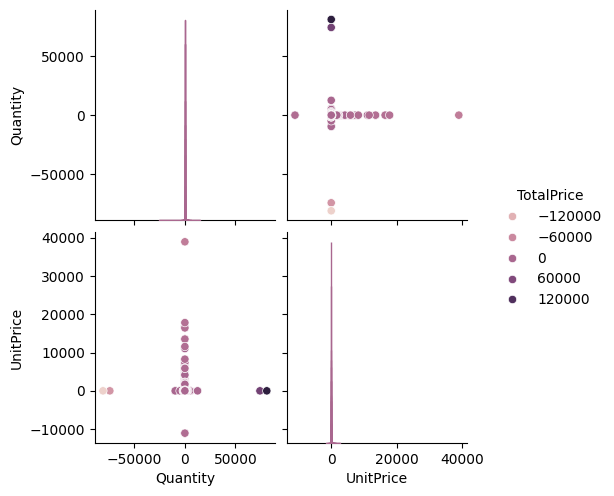

In [8]:
sns.pairplot(df,hue='TotalPrice')

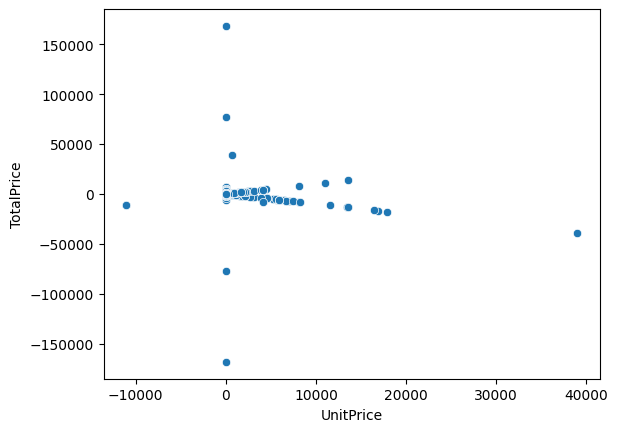

In [9]:
sns.scatterplot(data=df, x='UnitPrice', y='TotalPrice')
plt.show()

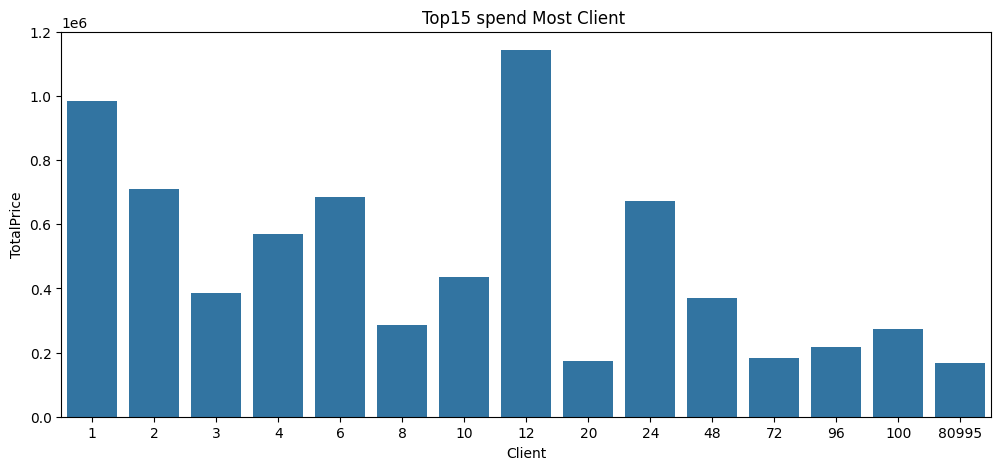

In [10]:
# Top15 spend Most Client
Rev_Coustomer=df.groupby('Quantity')['TotalPrice'].sum().sort_values(ascending=False).reset_index()[:15]
#Visualize
plt.figure(figsize=(12,5))
sns.barplot(x='Quantity', y='TotalPrice', data=Rev_Coustomer)
plt.title("Top15 spend Most Client ")
plt.xlabel('Client')
plt.ylabel('TotalPrice')
plt.show()

In [11]:
x=df.drop('TotalPrice',axis=1)
y=df['TotalPrice']

In [12]:
x

,Quantity,UnitPrice
0,6,2.55
1,6,3.39
2,8,2.75
3,6,3.39
4,6,3.39
...,...,...
541904,12,0.85
541905,6,2.10
541906,4,4.15
541907,4,4.15


In [13]:
x_scal=StandardScaler().fit_transform(x)

In [16]:
dim_red=PCA(n_components=2)

In [17]:
x_pca=dim_red.fit_transform(x_scal)

In [18]:
dim_red.components_

array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

In [19]:
dim_red.explained_variance_ratio_

array([0.50061746, 0.49938254])

In [20]:

dfpca=pd.DataFrame(x_pca,columns=dim_red.get_feature_names_out())
dfpca

,pca0,pca1
0,-0.003544,-0.026580
1,0.002594,-0.020442
2,-0.008568,-0.018634
3,0.002594,-0.020442
4,0.002594,-0.020442
...,...,...
541904,-0.035422,-0.019549
541905,-0.006833,-0.029869
541906,0.014633,-0.021372
541907,0.014633,-0.021372


In [21]:
dfpca['TotalPrice']=y
dfpca['TotalPrice']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: TotalPrice, Length: 541909, dtype: float64

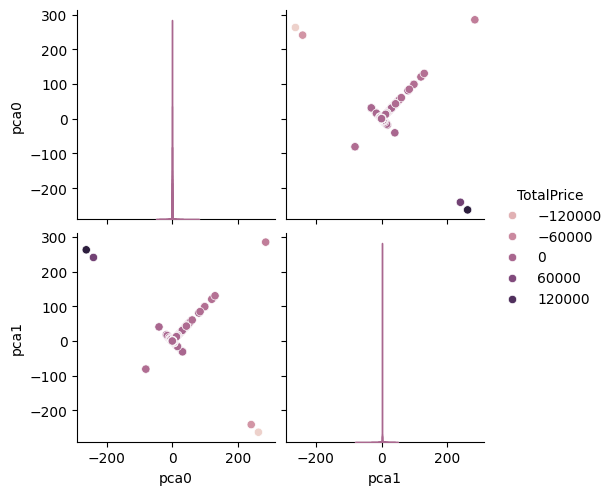

In [22]:
sns.pairplot(dfpca,hue='TotalPrice')

In [24]:
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_pca)
    inertia_values.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

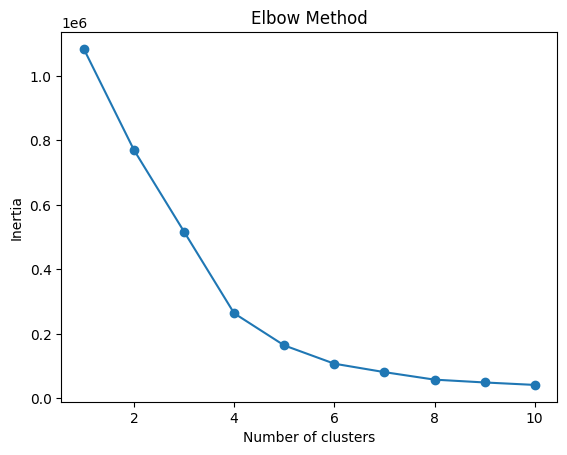

In [25]:
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [30]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x_pca)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

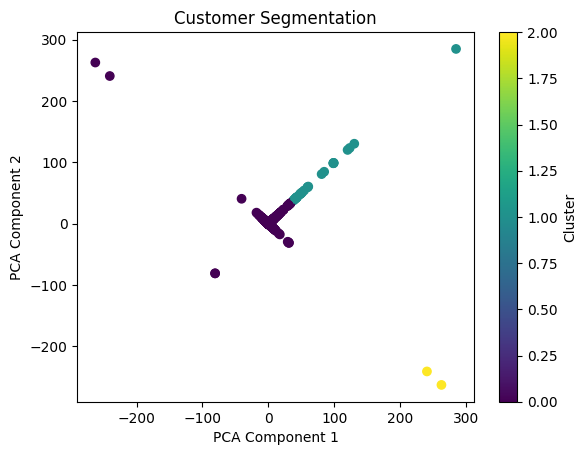

In [32]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segmentation')
plt.colorbar(label='Cluster')
plt.show()